# Welcome to the <span style="color:blue">Statistical Methods of Language Technologyb SoSe21</span> course
###  Dr. Seid Muhie Yimam
   * Email: yimam@informatik.uni-hamburg.de
   * Office: Informatikum, F-415
  
###  Dr. Özge Alaçam
   * Email: alacam@informatik.uni-hamburg.de
   * Office: Informatikum, F-435

## Topic of this week;
In this first practice class, we are going to focus on two main topics, which will be useful to complete the assignment;
* Earley Parsing
* Rule-based Chunking


## Deadline: 02/07 June

___

# <span style="color:red"> In class Exercises </span>

## <span style="color:red"> Problem 6.1 Earley Parsing </span>

Assume the following grammar:
\begin{align*}%
S~ &\rightarrow~NP~VP~~|~NP~\\
VP~&\rightarrow~V~NP~|~V~NP~PP~\\
NP~&\rightarrow~NP~PP~|~D~N~|~R~\\
PP~&\rightarrow~P~NP~\\
P~&\rightarrow~with~|~in~|~of~\\
V~&\rightarrow~see~|~take~|~make~\\
N~&\rightarrow~man~|~telescope~\\
D~&\rightarrow~the~|~an~|~a~\\
R~&\rightarrow~I~\\
\end{align*}

Parse the sentence **“I see the man with the telescope** top down with the Earley algorithm



### Hints:

**States** (table entries) represent:
+ Completed constituents and their locations
+ In-progress constituents
+ Predicted constituents

The table entries are called states and are represented with dotted rules:

Example taken from Lecture Notes (week5, slide 31)

* S -> <span style="color:red"> &#8226; </span> VP   (A VP is predicted)
* NP -> Det  <span style="color:red"> &#8226; </span>  Nominal (An NP is in progress)
* VP -> V   NP <span style="color:red"> &#8226; </span>  (A VP has been found)

With offsets:
* S -> <span style="color:red"> &#8226; </span>  VP  [0,0] (A VP is predicted at the start of the sentence)
* NP -> Det <span style="color:red"> &#8226; </span>  Nominal   [1,2] (An NP is in progress; the Det goes from 1 to 2)
* VP -> V NP <span style="color:red"> &#8226; </span>  [0,3] (A VP has been found starting at 0 and ending at 3


## Example from the lecture

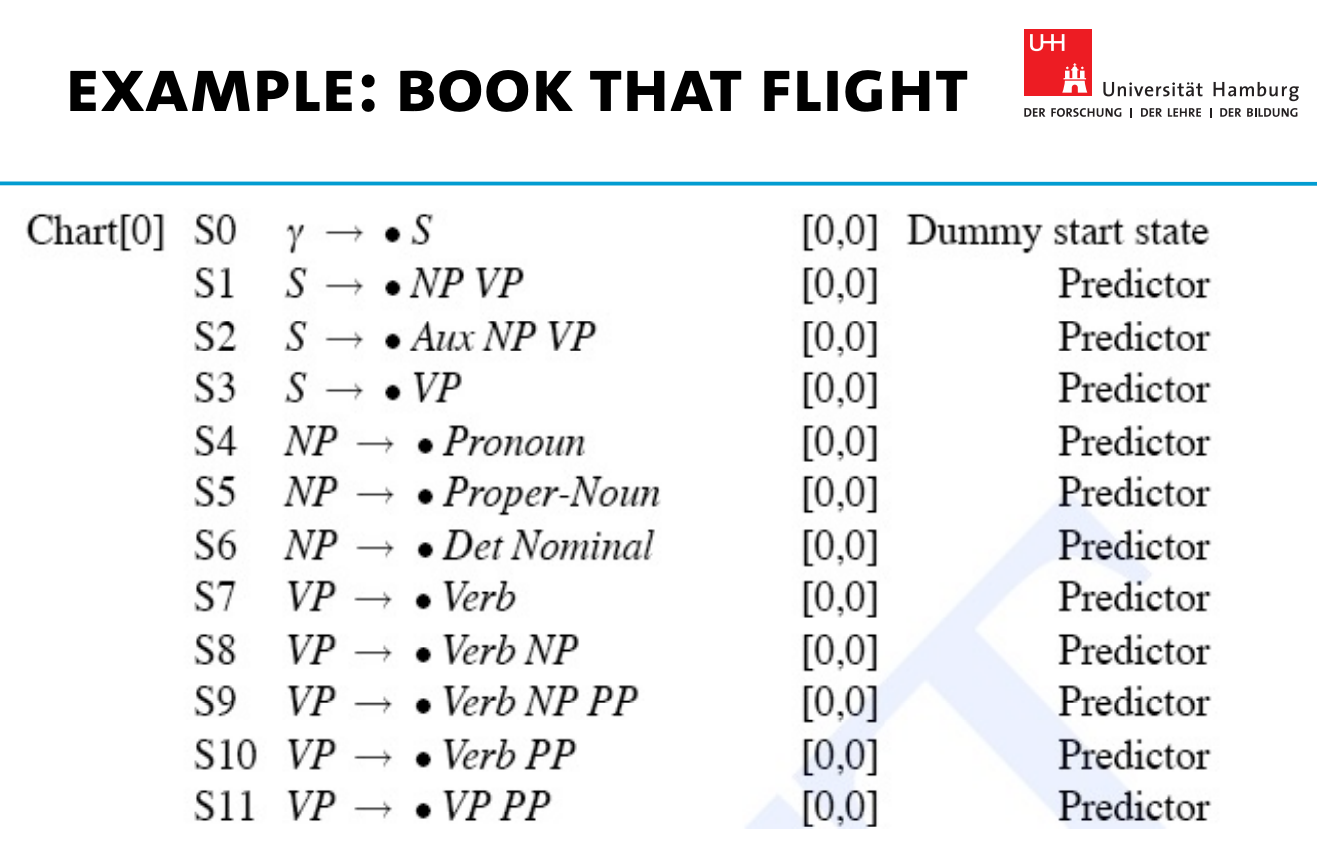


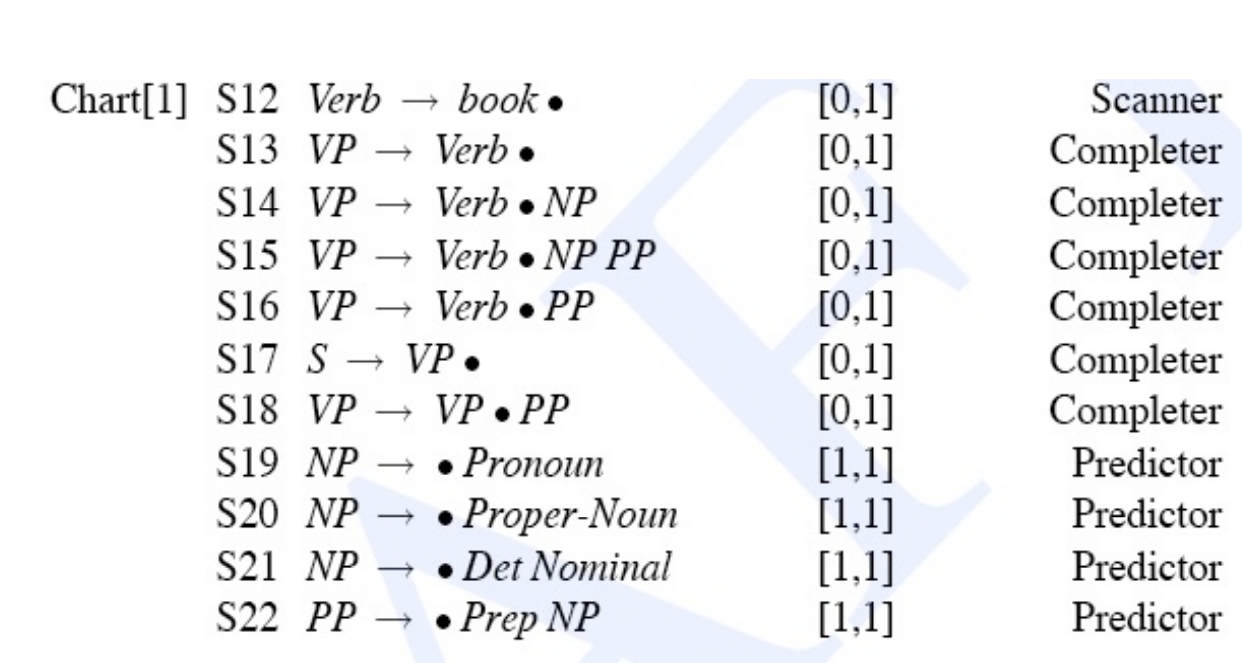


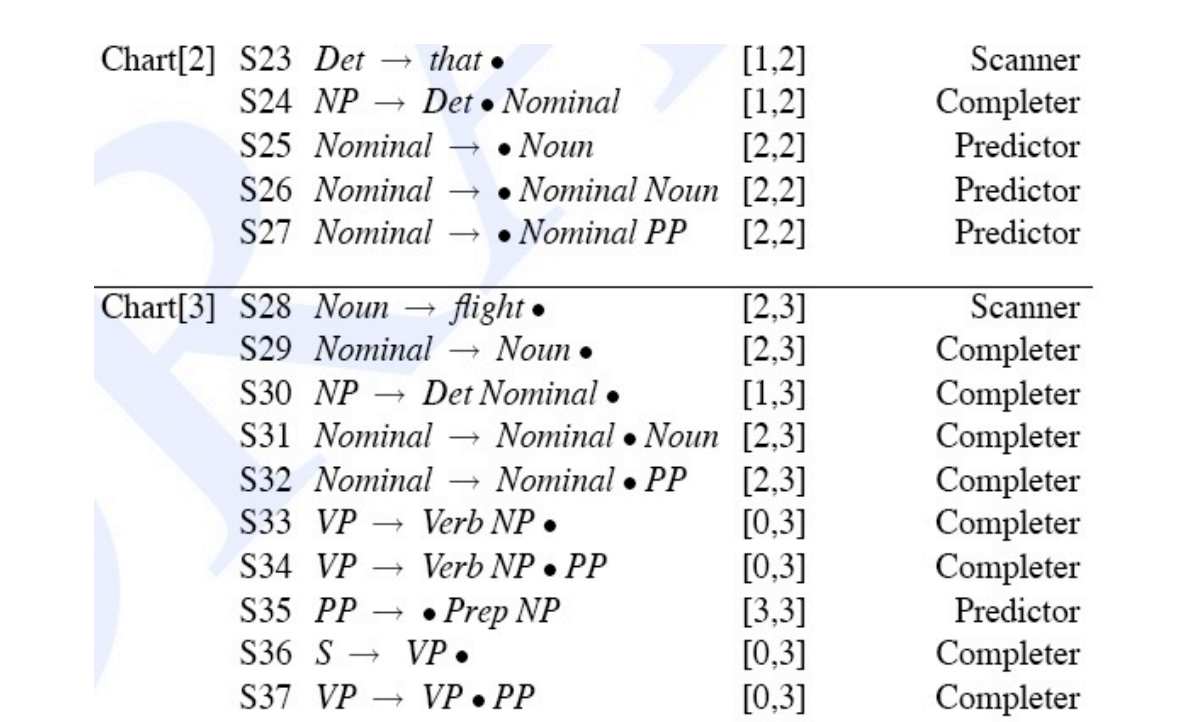


Download the **PC5-data.tar.gz** file from Moodle and unpack it. For evaluation, you need to have access to Perl (Windows users can use Babun, <http://babun.github.io/>).

We want to try a rule-based approach to chunking. As a preprocessing step for Information Extraction, we want to build our own NP Chunker.\\

Download the ``PC5-data.tar.gz`` file from Moodle and unpack it (same data as last week). For evaluation, you need to have access to Perl (Windows users can use Babun, (<http://babun.github.io/>). Python with NLTK <http://www.nltk.org/install.html> should also be installed.



Read the train, val and test files (you can either small or medium dataset)

In [ ]:
with open('PC5-data/test.small.data','r') as f:
  test_small=f.read()

with open('PC5-data/val.small.data','r') as f:
  val_small=f.read()

with open('PC5-data/train.small.data','r') as f:
  train_small=f.read()

#print(test_small)

#### a) Download the chunking scripts from Moodle (PC6-scripts.zip) and unpack them into the same folder as the chunking data. Run the following script (``6-chunking_1.py``).

What chunks do you see? Ideas for additional rules?

In [1]:
import nltk
from nltk.chunk.regexp import RegexpChunkRule

## Grammar section
sentence = [("Barack", "NNP"), ("Obama", "NNP"), ("was", "VBD"), ("born", "VBN"), ("in", "IN"), ("the","DT"), ("state","NN"), ("Hawaii", "NNP")]

# NP chunking rules
grammar = """NP: 
                {<NNP><NNP>}
                {<DT><NN><NNP>}
"""


cp = nltk.RegexpParser(grammar)

result = cp.parse(sentence)
print(result)
result.draw()


(S
  (NP Barack/NNP Obama/NNP)
  was/VBD
  born/VBN
  in/IN
  (NP the/DT state/NN Hawaii/NNP))



#### b) Run the second script (``6-chunking_2.py``). 

Which rules are missing to get the correct NP chunks? Add those rules to the grammar. (Try to solve this task without modifiers like "+", "*", etc.)

In [ ]:
import nltk
from nltk.chunk.regexp import RegexpChunkRule

## Grammar section
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"), ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]

# NP chunking rules
grammar = """NP: 
                {<DT><JJ>*<NN>} 
                {<DT><NN>}
"""

cp = nltk.RegexpParser(grammar)

result = cp.parse(sentence)
print(result)
result.draw()


#### c) Think of the following phrases:

+ The whole idea
+ Oil and auto companies
+ George Bush
+ the Obama administration
+ which
+ he
+ 100 million dollars

Create rules to cover these phrases.

#### d) Add your rules from the previous task and run your ruleset on the training set (``6-chunking\_3.py``). 

What is the performance? Use the ``conlleval.pl`` script!

In [ ]:
import sys
import nltk
from nltk.chunk.regexp import RegexpChunkRule


# helper functions for tuple creation
def group(lst, n):
  for i in range(0, len(lst), n):
    val = lst[i:i+n]
    if len(val) == n:
      yield tuple(val)

def postag(lst):
  for i in range(0, len(lst), 3):
    val = lst[i:i+2]
    if len(val) == 2:
      yield tuple(val)


# open file
raw_annotations = open("train.small.data").read()
split_annotations = raw_annotations.split()


# create tuples of gold annotation and postagged text
reference_annotations = list(group(split_annotations, 3))

postagged_text = list(postag(split_annotations))



## Grammar section

# NP chunking rules
grammar = """NP: 
                {<NNP>+}
                {<DT><NN>}
"""
cp = nltk.RegexpParser(grammar)

result = cp.parse(postagged_text)


# Convert prediction to multiline string and then to list (includes pos tags)
multiline_string = nltk.chunk.tree2conllstr(result)
listed_pos_and_np = multiline_string.split()


formatted_prediction = list(group(listed_pos_and_np, 3))

# output tab-separated result, add gold annotation
for n,res in enumerate(formatted_prediction):
  print (res[0] + "\t" +res[1] + "\t" + reference_annotations[n][2] + "\t" +res[2])


#### e) How would you progress to improve the performance?

Resources: For an explanation of the POS tags used, consider Penn Treebank:
<https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html>
A general tutorial on Information Extraction with NLTK:
<http://www.nltk.org/book/ch07.html#ref-chunkex-grammar>
Documentation of the RegexpChunk parser:
<http://www.nltk.org/api/nltk.chunk.html#nltk.chunk.regexp.RegexpChunkRule>

# Good luck with your assignment :-)